In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

In [47]:
#Compute TF-IDF values for the given corpus.
corpus = [];
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0, stop_words = 'english');
tweet_matrix=[];
def get_tfidf(corpus):
    global tweet_matrix
    tweet_matrix =  tf.fit_transform(corpus).todense();
    corpus = corpus;

In [48]:
# Matrix Factorization via multiplicative update rule
def nmf_kl_multiplicative(D, M, W, H, EPOCH=5000):
    MD = D.copy()
    MD[M==0] = 0
    for e in range(EPOCH):
        Xhat = W.dot(H)
        W=W*np.array(((MD/Xhat).dot(H.T)/np.dot(M, H.T)))
        Xhat = W.dot(H)
        H = H*np.array((W.T.dot(MD/Xhat)/np.dot(W.T, M)))
        #print(np.sum(np.abs(MD - M*Xhat))/np.sum(M))
    return W, H

In [49]:
# Regularized Matrix Factorization 
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

In [124]:
#Example Usage
corpus=[] 
#Tweets
user1_tweets = ("computer architecture and cpu design and embedded systems computer architecture and cpu design and embedded systems computer architecture and cpu design and embedded systems"); # String of last 100 tweets  
user2_tweets = ("rock n roll music"); 
user3_tweets = ("deep learning and neural networks");
user4_tweets = ("age of technology"); 
user5_tweets = ("political science"); 
user6_tweets = ("embedded systems and internet of things"); 
user7_tweets = ("embbeded design"); # String of last 100 tweets  
user8_tweets = ("jazz music"); 
user9_tweets = ("convolutional neural networks");
user10_tweets = ("developments in technology"); 
user11_tweets = ("political debate"); 
user12_tweets = ("embedded system design"); 
user13_tweets = ("computer architecture and cpu design and embedded systems"); # String of last 100 tweets  
user14_tweets = ("rock n roll music"); 
user15_tweets = ("deep learning and neural networks");
user16_tweets = ("age of technology"); 
user17_tweets = ("political science"); 
user18_tweets = ("embedded systems and internet of things"); 
user19_tweets = ("embbeded design"); # String of last 100 tweets  
user20_tweets = ("jazz music"); 
user21_tweets = ("convolutional neural networks");
user22_tweets = ("developments in technology"); 
user23_tweets = ("political debate"); 
user24_tweets = ("political debates relating internet and technology"); 

#Generate Corpus
corpus.append(user1_tweets);
corpus.append(user2_tweets);
corpus.append(user3_tweets);
corpus.append(user4_tweets);
corpus.append(user5_tweets);
corpus.append(user6_tweets);
corpus.append(user7_tweets);
corpus.append(user8_tweets);
corpus.append(user9_tweets);
corpus.append(user10_tweets);
corpus.append(user11_tweets);
corpus.append(user12_tweets);
corpus.append(user13_tweets);
corpus.append(user14_tweets);
corpus.append(user15_tweets);
corpus.append(user16_tweets);
corpus.append(user17_tweets);
corpus.append(user18_tweets);
corpus.append(user19_tweets);
corpus.append(user20_tweets);
corpus.append(user21_tweets);
corpus.append(user22_tweets);
corpus.append(user23_tweets);
corpus.append(user24_tweets);

print(corpus)


['computer architecture and cpu design and embedded systems computer architecture and cpu design and embedded systems computer architecture and cpu design and embedded systems', 'rock n roll music', 'deep learning and neural networks', 'age of technology', 'political science', 'embedded systems and internet of things', 'embbeded design', 'jazz music', 'convolutional neural networks', 'developments in technology', 'political debate', 'embedded system design', 'computer architecture and cpu design and embedded systems', 'rock n roll music', 'deep learning and neural networks', 'age of technology', 'political science', 'embedded systems and internet of things', 'embbeded design', 'jazz music', 'convolutional neural networks', 'developments in technology', 'political debate', 'political debates relating internet and technology']


In [198]:
get_tfidf(corpus);

ratings = np.array([5,1,4,3,1,5,5,1,3,3,1,5,5,1,4,3,1,5,5,1,np.nan,np.nan,np.nan,1]);
ground_truth = np.array([5,1,4,3,1,5,5,1,3,3,1,5,5,1,4,3,1,5,5,1,3,3,1,1]);
ground_truth=ground_truth.reshape(1,len(ratings));
tweet_matrix = np.array(tweet_matrix).T;
rating_matrix=ratings.reshape(1,len(ratings));
tweet_matrix = np.append(rating_matrix,tweet_matrix,axis=0)

def ShowMatrix(X,start,end,title=''):
    plt.figure()
    #plt.imshow(X[1:], interpolation='nearest',vmax=end,vmin=start)
    #plt.colorbar()
    #plt.set_cmap('jet')
    #plt.xlabel('User')
    #plt.ylabel('Tf-idf')
    #plt.title(title)
    #plt.show()
    plt.imshow(X, interpolation='nearest',vmax=5,vmin=0)
    plt.colorbar()
    plt.set_cmap('jet')
    plt.xlabel('User')
    plt.ylabel('Rating')
    plt.title(title)
    plt.show()

Ground Truth:
[[5 1 4 3 1 5 5 1 3 3 1 5 5 1 4 3 1 5 5 1 3 3 1 1]]
Predictions:
[ 5.  2.  4.  3.  2.  4.  4.  2.  3.  3.  2.  4.  5.  2.  4.  3.  2.  4.
  4.  2.  3.  2.  2.  2.]


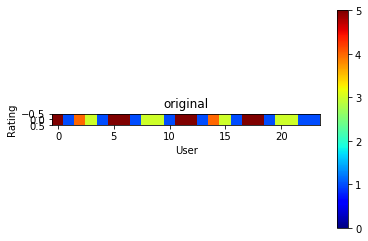

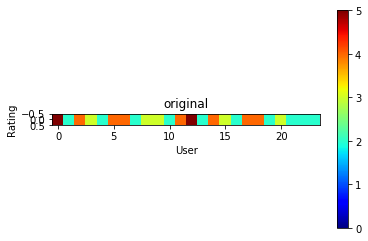

In [199]:
# Matrix Factorization using multiplicative update

#Rank
R = 1

# Data
Nr = tweet_matrix.shape[0]
Nc = tweet_matrix.shape[1]

# Initialize W and H with random numbers
W = np.random.rand(Nr, R)*100
H = np.random.rand(R, Nc)*100

#Mask
Mask = np.ones_like(tweet_matrix)
Mask[np.isnan(tweet_matrix)] = 0

W,H = nmf_kl_multiplicative(tweet_matrix, Mask, W, H, EPOCH=10)
Xhat = W.dot(H)

predictions = np.round(Xhat[0].reshape(1,len(Xhat[0])))

print("Ground Truth:")
print(ground_truth)
print("Predictions:")
print(np.round(W.dot(H)[0]))


ShowMatrix(ground_truth,0,5,'original')
ShowMatrix(predictions,0,5,'original')


#ShowMatrix(tweet_matrix,np.min(tweet_matrix[1:]),np.max(tweet_matrix[1:]),'original')
#ShowMatrix(Xhat,np.min(tweet_matrix[1:]),np.max(tweet_matrix[1:]),'estimate')


Ground Truth:
[[5 1 4 3 1 5 5 1 3 3 1 5 5 1 4 3 1 5 5 1 3 3 1 1]]
Predictions:
[ 5.  1.  4.  3.  1.  5.  5.  1.  3.  3.  1.  5.  5.  1.  4.  3.  1.  5.
  5.  1.  3.  3.  2.  1.]


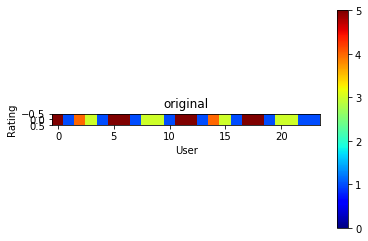

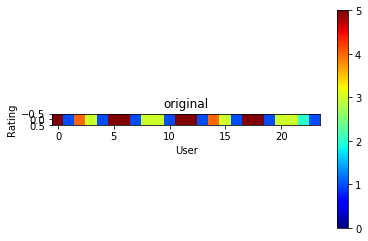

In [200]:
# Regularized Matrix Factorization

R = tweet_matrix
 
N = len(R)
M = len(R[0])
K = 2
 
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
 
nP, nQ = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)

predictions =np.round(nR[0].reshape(1,len(nR[0])))

print("Ground Truth:")
print(ground_truth)
print("Predictions:")
print(np.around(nR[0]))


ShowMatrix(ground_truth,0,5,'original')
ShowMatrix(predictions,0,5,'original')


#ShowMatrix(tweet_matrix,np.min(tweet_matrix[1:]),np.max(tweet_matrix[1:]),'original')
#ShowMatrix(nR,np.min(tweet_matrix[1:]),np.max(tweet_matrix[1:]),'estimate')
